In [ ]:
import pandas as pd
from zipfile import ZipFile
import os
import numpy as np

In [ ]:
path="fake-news"
if not os.path.exists(path):
    os.mkdir(path)
with ZipFile("fake-news detection.zip","r") as zp:
    zp.extractall(path)

In [ ]:
import pandas as pd
from zipfile import ZipFile
import os
import numpy as np
import warnings
path="fake-news"
pd.set_option('max_colwidth',-1)
warnings.filterwarnings('ignore')
df=pd.read_csv(path+"//"+str(os.listdir(path)[0]))   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [ ]:
df.sample(frac=1).reset_index(drop=True)
df.tail()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,"Vend is looking for some awesome new talent to come join us. You'll be working in an awesome team doing awesome things, and generally being awesome.Learn about us on our blog, or meet the team on Twitter, Facebook, LinkedInAwesome SpaceOur brand new Auckland office space is located on Nuffield Street in Newmarket, surrounded by our customers and the industry we love. It is huge, open, and shiny new with great meeting room spaces, casual working environments and plenty of space to host awesome events. We don't do cubicles, just plenty of space, whiteboards and meetings rooms. We also have a great cafe/retail space with our very own Front of House Manager taking care of our visitors and fellow Venders. Like Auckland our Melbourne office is surrounded by retail. It's a great wee space equipped with tiny houses and some awesome cardboard cutout animals.Our Toronto office is located right in the heart of downtown retail district. Like Melbourne and Auckland there's a great vibe with great coffee, boutique stores and some of the greatest restaurants in the city. Our SoMa office in San Francisco is located in the middle of the SF tech scene, just a (Biz) stone's throw from Twitter.The EnvironmentWe want you to be at the top of your game. You can wear whatever clothing you like, start work late in the morning, take breaks whenever you want and generally work the way you want to work. Who we're looking forVend is looking for people to push the boundaries. We are a hard working professional team with a wicked sense of humour, and we are looking for people who thrive in a collaborative open environment. We want passionate, hard working, talented individuals that want to lead in their field.","Just in case this is the first time you’ve visited our website Vend is an award winning web based point of sale software for retail. We’re chucking out crusty old cash registers and replacing them with iPads, touch screens and beautiful software, all of this to make life easier for our retailers. Vend is a fast-growing tech start-up, since launching in 2010 we’ve now got 10,000+ customers and 650 partners all over the world with more than 170 employees shared between our Auckland, Melbourne, Toronto, Berlin, London &amp; San Francisco offices.If you’re familiar with our (and many other SaaS companies) business model you’ll know and understand the importance of building a platform that appeals to a variety of customer shapes and sizes. We’re looking for someone who can build strong and strategic partnerships with our large distribution partnerships across North America.You'll be our master of large scale relationships, helping to deliver absolute excellence to our customer and their customers - bringing delight and ensuring the successful implementation of Vend at scale. You'll know how to get things done with large companies, you'll have multi-layered relationships from top to bottom and your attitude towards the challenges associated with working with such large companies is one of excitement. You get a total kick out of achieving ""the impossible"" and by helping these companies really change their customers worlds.","To ace this role you:Will eat comprehensive Statements of Work for breakfastHave been working in Enterprise Sales or Account Management preferably with telco and banks.Will have successfully developed and managed strong relationships across large organisations for a minimum of 5 yearsWill be motivated by the success of these relationships and how that delights our shared customers and exceeds their expectationsWill have experience administering large accounts - this means taking care of invoicing, pipeline management, facilitation of traini

In [ ]:
!pip install transformers
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import torch.nn as nn
import transformers
from transformers import AutoModel,BertTokenizerFast
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
import tensorflow_hub as hub


     |████████████████████████████████| 3.4 MB 7.6 MB/s 
     |████████████████████████████████| 895 kB 64.7 MB/s 
     |████████████████████████████████| 3.3 MB 40.9 MB/s 
     |████████████████████████████████| 596 kB 77.8 MB/s 
     |████████████████████████████████| 61 kB 678 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
plt.style.use('ggplot')
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.serif']='Ubuntu'
plt.rcParams['font.monospace']='Ubuntu Mono'
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize']=12
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.titlesize']=12
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['legend.fontsize']=12
plt.rcParams['figure.titlesize']=12
plt.rcParams['image.cmap']='jet'
plt.rcParams['image.interpolation']='jet'
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth']=2
plt.rcParams['lines.markersize']=8
colors = ['xkcd:pale range', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

([<matplotlib.patches.Wedge at 0x7f6ebceab750>,
 [Text(-0.1818881841167447, -1.1861351897986645, '0'),
  Text(0.18188823964374076, 1.1861351812838625, '1')],
 [Text(-0.10610144073476774, -0.6919121940492208, '95.2%'),
  Text(0.10610147312551545, 0.691912189082253, '4.8%')])

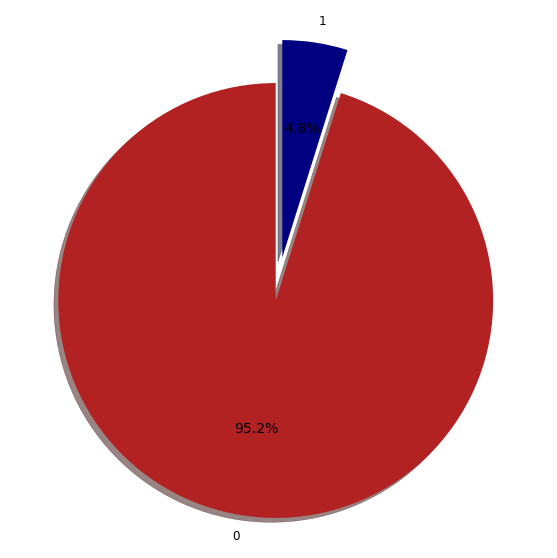

In [ ]:
df_copy=df.copy()
df_copy_fr=df_copy[df_copy["fraudulent"]==1]
plt.pie([df_copy["fraudulent"].value_counts()[0],df_copy["fraudulent"].value_counts()[1]],
        explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,
        shadow=True,labels=[0,1],autopct='%1.1f%%')

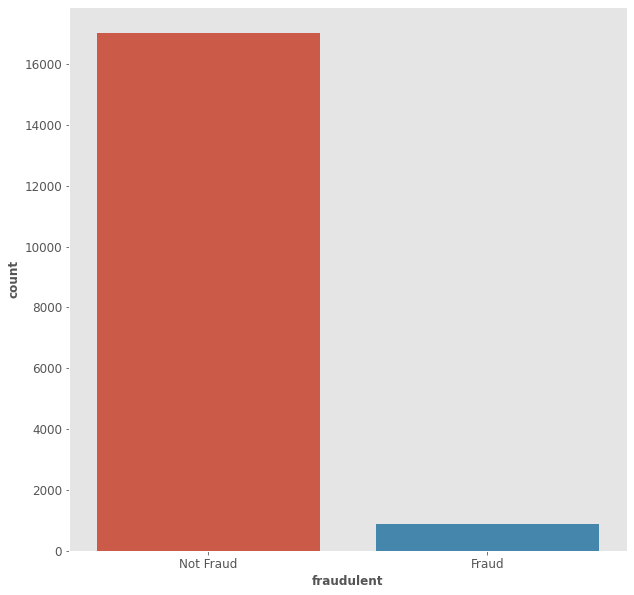

In [ ]:
import seaborn as sns
g=sns.countplot(df["fraudulent"])
g=g.set_xticklabels(['Not Fraud',"Fraud"])
plt.show()

In [ ]:
df_copy.interpolate(inplace=True) 
df_copy.isnull().sum()

job_id                 0    
title                  0    
location               346  
department             11547
salary_range           15012
company_profile        3308 
description            1    
requirements           2695 
benefits               7210 
telecommuting          0    
has_company_logo       0    
has_questions          0    
employment_type        3471 
required_experience    7050 
required_education     8105 
industry               4903 
function               6455 
fraudulent             0    
dtype: int64

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
columns=["job_id","telecommuting","has_company_logo","employment_type","salary_range","has_questions"]
for col in columns:
    del df_copy[col]
df_copy.fillna(' ',inplace=True) 


Text(0, 0.5, 'No of jobs postings')

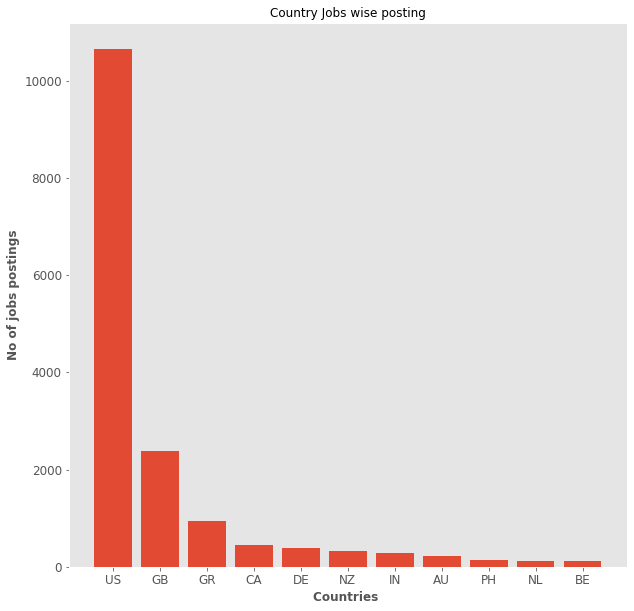

In [ ]:
def split(location: str):
    r=location.split(',')
    return r[0]
df_copy['country']=df_copy.location.apply(split)
country=dict(df_copy.country.value_counts()[:12])
del country[' ']
plt.title("Country Jobs wise posting")
plt.bar(country.keys(),country.values())
plt.xlabel("Countries ",size=12)
plt.ylabel("No of jobs postings",size=12)

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

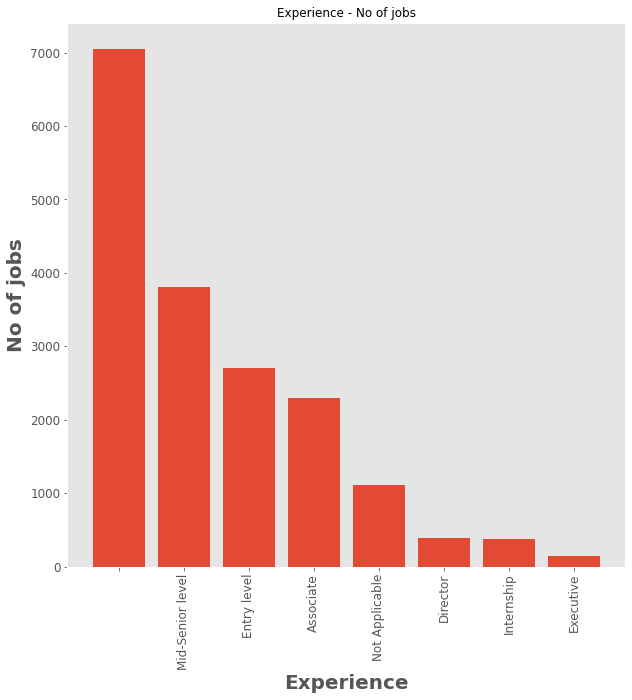

In [ ]:
experience=dict(df_copy.required_experience.value_counts())
plt.title("Experience - No of jobs")
plt.bar(experience.keys(),experience.values())
plt.xlabel("Experience",size=20)
plt.ylabel("No of jobs",size=20) 
plt.xticks(rotation=90)

In [ ]:
df_copy[df_copy["fraudulent"]==1].title.value_counts()[:12]

Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Data Entry Admin/Clerical Positions - Work From Home                    21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Account Sales Managers $80-$130,000/yr                                  10
Payroll Clerk                                                           10
Network Marketing                                                       10
Data Entry                                                              9 
Agency Sales Managers $150-$175,000/yr                                  9 
Name: title, dtype: int64

In [ ]:
df_copy[df_copy["fraudulent"]==0].title.value_counts()[:12]

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                95 
Software Engineer                                     86 
English Teacher Abroad (Conversational)               83 
Customer Service Associate - Part Time                76 
Account Manager                                       73 
Web Developer                                         66 
Project Manager                                       62 
Beauty & Fragrance consultants needed                 60 
Graduates: English Teacher Abroad                     57 
Name: title, dtype: int64

In [ ]:
df_copy["text"]=df_copy["title"]+' '+df_copy["location"]+' '+df_copy["company_profile"]+' '+df_copy["description"]+' '+df_copy["requirements"]+' '+df_copy["benefits"]+' '+df_copy["industry"]+' '+df_copy["function"]

In [ ]:
del df_copy["title"]
del df_copy["location"]
del df_copy["company_profile"]
del df_copy["description"]
del df_copy["requirements"]
del df_copy["benefits"]
del df_copy["industry"]
del df_copy["function"]


In [ ]:
df_copy["text"]=df_copy["text"]+" "+df_copy["required_experience"]+" "+df_copy["required_education"]
del df_copy["required_experience"]
del df_copy["required_education"]
#

In [ ]:
del df_copy["department"]

In [ ]:
del df_copy["country"]
df_copy.sample(5)

fraudulent                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

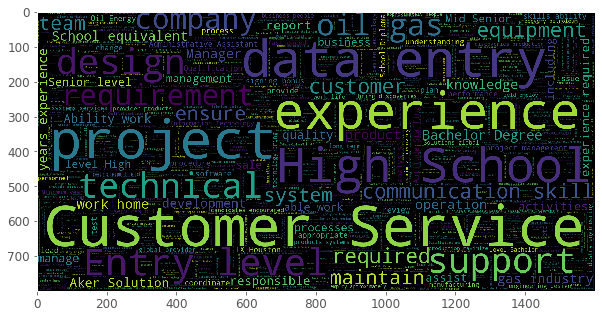

In [ ]:
fraudulent_job=df_copy[df["fraudulent"]==1].text
n_fraudulent_job=df_copy[df["fraudulent"]==0].text
STOPWORDS=STOP_WORDS
wc=WordCloud(min_font_size=3,max_words=5000,height=800,width=1600,stopwords=STOPWORDS).generate(str(" ".join(fraudulent_job)))
plt.imshow(wc,interpolation="nearest")

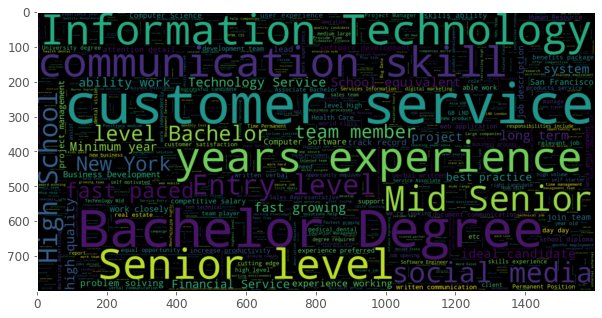

In [ ]:
wc2=WordCloud(min_font_size=3,max_words=5000,height=800,width=1600,stopwords=STOPWORDS).generate(str(" ".join(n_fraudulent_job)))
plt.imshow(wc2,interpolation="bilinear")

In [ ]:
!pip install sentencepiece
from transformers import XLNetModel, XLNetTokenizerFast, XLNetForSequenceClassification
tokenizer = XLNetTokenizerFast.from_pretrained('xlnet-base-cased', do_lower_case=True)

     |████████████████████████████████| 1.2 MB 9.9 MB/s 


Downloading:   0%|          | 0.00/779k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

In [ ]:
from transformers import XLNetForSequenceClassification
model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=2)

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'logits_proj.weight', 'logits_proj.bias', 'sequence_summary.summary.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [ ]:
sentences=df_copy.text.values
sentences=[sentence+" [SEP] [CLS]" for sentence in sentences]
labels=df_copy.fraudulent.values


In [ ]:

tokenizer_texts=[tokenizer.tokenize(sent) for sent in sentences]
print("Tokenize the first sentence:")
print(tokenizer_texts[0])

Tokenize the first sentence:
['▁Marketing', '▁In', 'tern', '▁US', ',', '▁NY', ',', '▁New', '▁York', '▁We', "'", 're', '▁Food', '52', ',', '▁and', '▁we', "'", 've', '▁created', '▁a', '▁groundbreaking', '▁and', '▁award', '-', 'winning', '▁cooking', '▁site', '.', '▁We', '▁support', ',', '▁connect', ',', '▁and', '▁celebrate', '▁home', '▁cook', 's', ',', '▁and', '▁give', '▁them', '▁everything', '▁they', '▁need', '▁in', '▁one', '▁place', '.', 'We', '▁have', '▁a', '▁top', '▁editorial', ',', '▁business', ',', '▁and', '▁engineering', '▁team', '.', '▁We', "'", 're', '▁focused', '▁on', '▁using', '▁technology', '▁to', '▁find', '▁new', '▁and', '▁better', '▁ways', '▁to', '▁connect', '▁people', '▁around', '▁their', '▁specific', '▁food', '▁interests', ',', '▁and', '▁to', '▁offer', '▁them', '▁superb', ',', '▁highly', '▁', 'cur', 'ated', '▁information', '▁about', '▁food', '▁and', '▁cooking', '.', '▁We', '▁attract', '▁the', '▁most', '▁talented', '▁home', '▁cook', 's', '▁and', '▁contributors', '▁in', '▁th

In [ ]:
max_len=128
input_ids=[tokenizer.convert_tokens_to_ids(x) for x in tokenizer_texts]
from keras.preprocessing.sequence import pad_sequences
input_ids=pad_sequences(input_ids,maxlen=max_len,dtype="long",truncating="post",padding="post")

In [ ]:
from imblearn.under_sampling import TomekLinks
from collections import Counter
#t1=RandomOverSampler(sampling_strategy="majority")
x=input_ids
y=labels
tom=TomekLinks()
print(x.shape,y.shape)
x_t1,y_t1=tom.fit_resample(x,y)
print("Resampled dataset shape: {}".format(Counter(y_t1)))

(17880, 128) (17880,)
Resampled dataset shape: Counter({0: 17006, 1: 866})


In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X,Y=smote.fit_resample(x_t1,y_t1)
print("Resample data shape {}".format(Counter(Y)))
attention_masks=[]
for seq in X:
    seq_mask=[float(i>0) for i in seq]
    attention_masks.append(seq_mask)
train_inputs,validation_inputs,train_labels,validation_labels=train_test_split(X,Y,random_state=42,test_size=0.4)
train_masks,validation_masks,_,_=train_test_split(attention_masks,X,random_state=42,test_size=0.4)
train_inputs=torch.tensor(train_inputs)
validation_inputs=torch.tensor(validation_inputs)
train_labels=torch.tensor(train_labels)
validation_labels=torch.tensor(validation_labels)
train_masks=torch.tensor(train_masks)
validation_masks=torch.tensor(validation_masks)    

Resample data shape Counter({0: 17006, 1: 17006})


In [ ]:
from torch.utils.data import DataLoader,TensorDataset,RandomSampler ,SequentialSampler
batch_size=32
train_data=TensorDataset(train_inputs,train_masks,train_labels)
train_sampler=RandomSampler(train_data)
train_dataloader=DataLoader(train_data,sampler=train_sampler,batch_size=batch_size)
validation_data=TensorDataset(validation_inputs,validation_masks,validation_labels)
validation_sampler=RandomSampler(validation_data)
validation_dataloader=DataLoader(validation_data,sampler=validation_sampler,batch_size=batch_size)
from transformers import AdamW
from tqdm import tqdm,trange
param_optimizers=list(model.named_parameters())
no_decay=["bias","gamma","beta"]
optimizer_grouped_parameters=[{'params': [p for n,p in param_optimizers if not any(nd in n for nd in no_decay)],
                              'weight_decay_rate':0.01},
                            {'params': [p for n,p in param_optimizers if any(nd in n for nd in no_decay)],
                            'weight_decay_rate':0.00}]
optimizer=AdamW(optimizer_grouped_parameters,lr=2e-5)


In [ ]:
epochs=3
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_loss_set=[]
for _ in trange(epochs,desc="Epoch"):
    model.train()
    nb_trsteps=0
    tr_loss=0
    nbtr_examples=0
    for step,batch in enumerate(train_dataloader):
        batch=tuple(t.to(device) for t in batch)
        b_inputX,b_input_masks,b_labels=batch
        optimizer.zero_grad()
        outputs=model(b_inputX,token_type_ids=None,attention_mask=b_input_masks,labels=b_labels)
        loss=outputs[0]
        logits=outputs[1]
        train_loss_set.append(loss.item())
        loss.backward()
        optimizer.step()
        tr_loss+=loss.item()
        nb_trsteps+=1
        nbtr_examples+=b_inputX.size(0)
    print("Train Loss {}".format(tr_loss/nb_trsteps))
    

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]